# Implement Troubleshooting Techniques

### Install the necessary libraries

In [1]:
pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Troubleshooting Mode Collapse in GANs

### Import the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model

2025-09-17 22:19:44.869878: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-17 22:19:44.916466: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-17 22:19:47.095044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
def build_generator(latent_dim):
    # Input layer with latent dimensions
    latent_input = Input(shape=(latent_dim,))
    
    ## TODO -- Add Gaussian noise to input
    noisy_latent = GaussianNoise(0.1)(latent_input)

    # Building the generator network
    x = Dense(256, activation='relu')(noisy_latent)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    generated_image = Dense(784, activation='sigmoid')(x)  # Assuming we're generating 28x28 images

    # Create model
    model = Model(inputs=latent_input, outputs=generated_image)
    return model

### Use the generator to generate and visualize images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


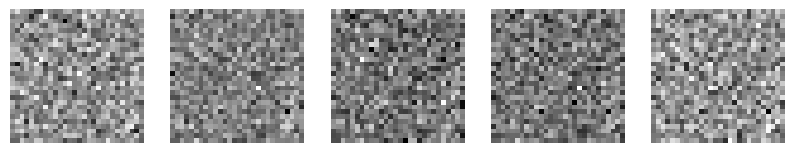

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Build the generator
latent_dim = 100
generator = build_generator(100)

# Generate random latent vectors
num_samples = 5
random_latent_vectors = np.random.normal(0, 1, (num_samples, latent_dim))

# Generate images from the latent vectors
generated_images = generator.predict(random_latent_vectors)

# Reshape and plot the generated images
generated_images = generated_images.reshape(num_samples, 28, 28)

# Plot the generated images
plt.figure(figsize=(10,2))

for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(generated_images[i], cmap='gray')
  plt.axis('off')

plt.show()
